In [11]:
import seaborn as sns
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

In [12]:
df = pd.read_csv("Emission.csv",parse_dates=True,index_col='Year-Month')

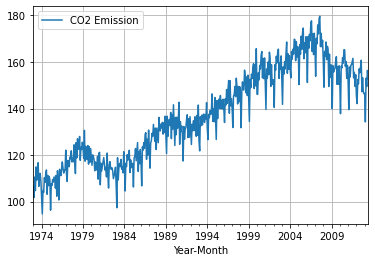

In [13]:
df.plot(grid=True);

In [14]:
train    =   df[0:int(len(df)*0.8)] 
test     =   df[int(len(df)*0.8):]

In [15]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

SES_predict = model_SES_autofit.forecast(steps=len(test))

C:\Users\Jitu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Jitu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [16]:
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE (calculated using statsmodels): 9.922371001205502


In [17]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()
DES_predict =  model_DES.forecast(len(test))
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 22.404016786882526


C:\Users\Jitu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [18]:
df = pd.read_csv("Emission.csv",parse_dates=True,index_col='Year-Month')
df['CO2 Emission'] = np.log(df['CO2 Emission'])
df

,CO2 Emission
Year-Month,
1973-01-01,4.666858
1973-02-01,4.622617
1973-03-01,4.705495
1973-04-01,4.651424
1973-05-01,4.744036
...,...
2013-02-01,4.899652
2013-03-01,5.030948
2013-04-01,5.006908


In [19]:
train    =   df[0:int(len(df)*0.8)] 
test     =   df[int(len(df)*0.8):]

model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

model_SES_autofit = model_SES.fit(optimized=True)
SES_predict = model_SES_autofit.forecast(steps=len(test))
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE (calculated using statsmodels): 0.06295357070047974


C:\Users\Jitu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Jitu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
